# 《Python 机器学习经典实例 Python Machine Learning Cookbook》
## https://github.com/packtpublishing/python-machine-learning-cookbook

## 1.2.2　详细步骤
数据可以通过许多技术进行预处理，接下来将介绍一些最常用的预处理技术。

In [1]:
#preprocessing.py
# 1.2 数据预处理
import numpy as np
from sklearn import preprocessing
# 导入预处理模块
data = np.array([[ 3, -1.5,  2, -5.4],
                 [ 0,  4,  -0.3, 2.1],
                 [ 1,  3.3, -1.9, -4.3]])

### 1.均值移出 mean removal
### 标准化
移出特征平均值，保证特征值为0(标准化) 以消除特征间的偏差(bias)

通常我们会把每个特征的平均值移除，以保证特征均值为0（即标准化处理）。
这样做可以消除特征彼此间的偏差（bias）

In [2]:
data_standardized = preprocessing.scale(data)
# 对数据data使用预处理模块/将data装入模块，赋给方法对象变量。
# 这个对象变量是包含着数据data的一段函数程序，指定程序里的子程序(函数)
# 并且代入参数，就可以返回计算的结果。
print ("Mean =", data_standardized.mean(axis=0))
# 显示方法的某个方法：数据_标准化方法的平均值。axis=0 沿着列向计算。
print ("Std deviation =", data_standardized.std(axis=0))
# 显示方法的某个方法：数据_标准化方法的标准差。
#显示特征均值几乎为0，标准差为1。

Mean = [ 5.55111512e-17 -1.11022302e-16 -7.40148683e-17 -7.40148683e-17]
Std deviation = [1. 1. 1. 1.]


In [6]:
?preprocessing.scale()


### 2.范围缩放 min max scaling

数据点的每个特征值范围变化可能很大，将其缩放到合理很重要

数据点中每个特征的数值范围可能变化很大，因此，
有时将特征的数值范围缩放到合理的大小是非常重要的

In [3]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
#先将模块赋值给变量
data_scaled = data_scaler.fit_transform(data)
#再对数据使用模块里的方法
print ("Min max scaled data:\n", data_scaled)

Min max scaled data:
 [[1.         0.         1.         0.        ]
 [0.         1.         0.41025641 1.        ]
 [0.33333333 0.87272727 0.         0.14666667]]


范围缩放之后，所有数据点的特征数值都位于指定的数值范围内。feature_range=(0, 1)

### 3.归一化  normalization
调整特征向量的值，保证每个特征向量值都缩放到相同范围。
机器学习常用归一化形式是将特征向量调整为L1范数，使特征向量值之和=1。

In [4]:
data_normalized = preprocessing.normalize(data, norm='l1')
print ("L1 normalized data:\n", data_normalized)

L1 normalized data:
 [[ 0.25210084 -0.12605042  0.16806723 -0.45378151]
 [ 0.          0.625      -0.046875    0.328125  ]
 [ 0.0952381   0.31428571 -0.18095238 -0.40952381]]


这个方法经常用于确保数据点没有因为特征的基本性质而产生较大差异，
即确保数据处于同一数量级，提高不同特征数据的可比性。

### 4.二值化  binarization
二值化用于将数值特征向量转换为布尔类型向量。

In [5]:
data_binarized = preprocessing.Binarizer(threshold=1.4).transform(data)
print ("\nBinarized data:\n", data_binarized)


Binarized data:
 [[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


如果事先已经对数据有了一定的了解，就会发现使用这个技术的好处了。

### 5.独热编码  one hot encoding
通常，需要处理的数值都是稀疏地、散乱地分布在空间中，
然而，我们并不需要存储这些大数值，这时就需要使用独热编码（One-Hot Encoding）。
可以把独热编码看作是一种收紧（tighten）特征向量的工具。
它把特征向量的每个特征与特征的非重复总数相对应，
通过 one-of-k 的形式对每个值进行编码。
特征向量的每个特征值都按照这种方式编码，这样可以更加有效地表示空间。
例如，我们需要处理4维向量空间，当给一个特性向量的第 n 个特征进行编码时，
编码器会遍历每个特征向量的第 n 个特征，然后进行非重复计数。
如果非重复计数的值是 K ，那么就把这个特征转换为只有一个值是1其他值都是0的 K 维向量。


In [6]:
encoder = preprocessing.OneHotEncoder()
encoder.fit([[0, 2, 1, 12], [1, 3, 5, 3], [2, 3, 2, 12], [1, 2, 4, 3]])

encoded_vector = encoder.transform([[2, 3, 5, 3]]).toarray()
print ("\nEncoded vector:\n", encoded_vector)


Encoded vector:
 [[0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]


在上面的示例中，观察一下每个特征向量的第三个特征，
分别是1、5、2、4这4个不重复的值，也就是说独热编码向量的长度是4。
如果你需要对5进行编码，那么向量就是[0, 1, 0, 0]。
向量中只有一个值是1。第二个元素是1，对应的值是5
#每个特征向量只有第三个特征不同,1,5,2,4,即独热编码向量长度是4.
#如果对5编码,向量是[0,0,0,1],向量里只有一个值1,第二个元素是1,对应值是5.?不懂! 上一版。

## 1.3标记编码方法 label_encoder.py
在监督学习中，经常需要处理各种各样的标记。这些标记可能是数字，也可能是单词。
如果标记是数字，那么算法可以直接使用它们，但是，许多情况下，
标记都需要以人们可理解的形式存在，因此，人们通常会用单词标记训练数据集。
标记编码就是要把单词标记转换成数值形式，让算法懂得如何操作标记。
接下来看看如何标记编码。


### 详细步骤

(1) 新建一个 Python 文件，然后导入 preprocessing 程序包：

In [21]:
import numpy as np
from sklearn import preprocessing

(2) 这个程序包包含许多数据预处理需要的函数。定义一个标记编码器（label encoder）
包里有多个数据预处理函数

In [8]:
label_encoder = preprocessing.LabelEncoder()

(3) 对象label_encoder知道如何理解单词标记，创建标记

In [9]:
input_classes = ['audi', 'ford', 'audi', 'toyota', 'ford', 'bmw']

(4) 为标记编码(方法一)

In [10]:
label_encoder.fit(input_classes)

# print classes
print ("Class mapping:")
for i, item in enumerate(label_encoder.classes_):
    print (item, '-->', i)

Class mapping:
audi --> 0
bmw --> 1
ford --> 2
toyota --> 3


(6)（方法二）transform a set of classes
    
就像前面结果显示的那样，单词被转换成从0开始的索引值。
现在，如果你遇到一组标记，就可以非常轻松地转换它们了

In [11]:
labels = ['toyota', 'ford', 'audi']
encoded_labels = label_encoder.transform(labels)
print ("\nLabels =", labels)
print ("Encoded labels =", list(encoded_labels))


Labels = ['toyota', 'ford', 'audi']
Encoded labels = [3, 2, 0]


### 7.inverse transform 
(7) 这种方式比纯手工进行单词与数字的编码要简单许多。
还可以通过数字反转回单词的功能检查结果的正确性：

In [12]:
encoded_labels = [2, 1, 0, 3, 1]
decoded_labels = label_encoder.inverse_transform(encoded_labels)
print ("\nEncoded labels =", encoded_labels)
print ("Decoded labels =", list(decoded_labels))


Encoded labels = [2, 1, 0, 3, 1]
Decoded labels = ['ford', 'bmw', 'audi', 'toyota', 'bmw']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


可以看到，映射结果是完全正确的。

## 1.4　创建线性回归器

回归是估计输入数据与连续值输出数据之间关系的过程。
数据通常是实数形式的，我们的目标是估计满足输入到输出映射关系的基本函数。
### 1.4.1　准备工作
线性回归用输入变量的线性组合来估计基本函数。
前面的示例就是一种单输入单输出变量的线性回归。

线性回归的目标是提取输入变量与输出变量的关联线性模型，
这就要求实际输出与线性方程预测的输出的残差平方和
（sum of squares of differences）最小化。
这种方法被称为普通最小二乘法（Ordinary Least Squares，OLS）。

你可能觉得用一条曲线对这些点进行拟合效果会更好，但是线性回归不允许这样做。
线性回归的主要优点就是方程简单。如果你想用非线性回归，可能会得到更准确的模型，
但是拟合速度会慢很多。线性回归模型就像前面那张图里显示的，
用一条直线近似数据点的趋势。接下来看看如何用 Python 建立线性回归模型。
### 1.4.2　详细步骤
假设你已经创建了数据文件 data_singlevar.txt，文件里用逗号分隔符分割字段，
第一个字段是输入值，第二个字段是与逗号前面的输入值相对应的输出值。
你可以用这个文件作为输入参数。

(1) 创建一个 Python 文件 regressor.py，然后在里面增加下面几行代码：


In [1]:
# 1.4 线形回归器
#regressor.py with datafile data_singlevar.txt
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = sys.argv[1]
X = []
y = []
with open("data_singlevar.txt", 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

$ python regressor.py data_singlevar.txt         cmd 下执行程序 数据文件

把输入数据加载到变量X和y，其中X是数据，y是标记。
在代码的for循环体中，我们解析每行数据，用逗号分割字段。
然后，把字段转化为浮点数，并分别保存到变量X和y中。

(2) 建立机器学习模型时，需要用一种方法来验证模型，
检查模型是否达到一定的满意度（satisfactory level）。
为了实现这个方法，把数据分成两组：
训练数据集（training dataset）与测试数据集（testing dataset）。
训练数据集用来建立模型，测试数据集用来验证模型对未知数据的学习效果。
因此，先把数据分成训练数据集与测试数据集：

In [2]:
#2.为了检验机器学习模型是否达到满意度，将数据分为训练和测试2组
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

这里用80%的数据作为训练数据集，其余20%的数据作为测试数据集。

(3) 现在已经准备好训练模型。接下来创建一个回归器对象，代码如下所示：

In [3]:
#3.已经准备好了训练模型，创建回归器对象
# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
print('1-> ', linear_regressor)

#用训练数据集训练线形回归器，向fit方法输入数据即可
# Train the model using the training sets
linear_regressor.fit(X_train, y_train)
print('2-> ', linear_regressor) # 训练了以后回归器有什么变化？在哪里发生了变化？20190322

1->  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
2->  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


(4) 检查拟合

我们利用训练数据集训练了线性回归器。向fit方法提供输入数据即可训练模型。
用下面的代码看看它如何拟合：

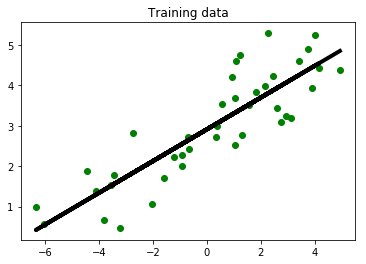

In [4]:
# Plot outputs
import matplotlib.pyplot as plt
y_train_pred = linear_regressor.predict(X_train)
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

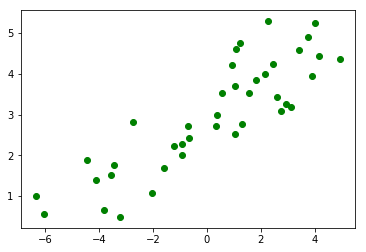

In [71]:
# 画散点图
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure()
plt.scatter(X_train, y_train, color='green') # 原始数据

就会看到如图1-2所示的线性回归。

(6) 在前面的代码中，我们用训练的模型预测了训练数据的输出结果，但这并不能说明模型对未知的数据也适用，因为我们只是在训练数据上运行模型。这只能体现模型对训练数据的拟合效果。从图1-2中可以看到，模型训练的效果很好。

(7) 接下来用模型对测试数据集进行预测，然后画出来看看，代码如下所示：


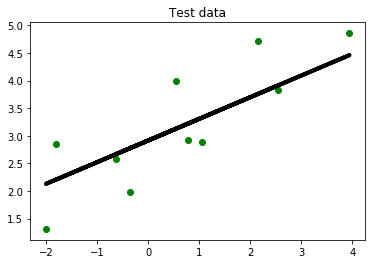

In [5]:
# Predict the output
y_test_pred = linear_regressor.predict(X_test)

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

运行代码，可以看到如图1-3所示的线性回归。

## 1.5　计算回归准确性
现在已经建立了回归器，接下来最重要的就是如何评价回归器的拟合效果。在模型评价的相关内容中，用误差（error）表示实际值与模型预测值之间的差值。

### 1.5.1　准备工作
下面快速了解几个衡量回归器拟合效果的重要指标（metric）。回归器可以用许多不同的指标进行衡量，部分指标如下所示。

平均绝对误差（mean absolute error）：这是给定数据集的所有数据点的绝对误差平均值。

均方误差（mean squared error）：这是给定数据集的所有数据点的误差的平方的平均值。这是最流行的指标之一。

中位数绝对误差（median absolute error）：这是给定数据集的所有数据点的误差的中位数。这个指标的主要优点是可以消除异常值（outlier）的干扰。测试数据集中的单个坏点不会影响整个误差指标，均值误差指标会受到异常点的影响。

解释方差分（explained variance score）：这个分数用于衡量我们的模型对数据集波动的解释能力。如果得分1.0分，那么表明我们的模型是完美的。

R方得分（R2 score）：这个指标读作“R方”，是指确定性相关系数，用于衡量模型对未知样本预测的效果。最好的得分是1.0，值也可以是负数。

### 1.5.2　详细步骤
scikit-learn 里面有一个模块，提供了计算所有指标的功能。重新打开一个 Python 文件，然后输入以下代码：


In [6]:
# Measure performance
import sklearn.metrics as sm

print ( "Mean absolute error 平均误差=", round(sm.mean_absolute_error(y_test, y_test_pred), 2) )
print ( "Mean squared error 均方误差=", round(sm.mean_squared_error(y_test, y_test_pred), 2) )
print ( "Median absolute error 中位数绝对误差=", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print ( "Explain variance score 解释方差分best 1=", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print ( "R2 score R方得分，相关系数best 1=", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error 平均误差= 0.54
Mean squared error 均方误差= 0.38
Median absolute error 中位数绝对误差= 0.54
Explain variance score 解释方差分best 1= 0.68
R2 score R方得分，相关系数best 1= 0.68


每个指标都描述得面面俱到是非常乏味的，因此只选择一两个指标来评估我们的模型。通常的做法是尽量保证均方误差最低，而且解释方差分最高

### 1.6　保存模型数据
模型训练结束之后，如果能够把模型保存成文件，那么下次再使用的时候，只要简单地加载就可以了。

详细步骤

用程序保存模型的具体操作步骤如下。

(1) 在 Python 文件 regressor.py 中加入以下代码：

In [7]:
import pickle as pickle
# output_model_file = 'saved_model.pkl'
output_model_file = 'saved_model.pkl'
with open(output_model_file, 'wb') as f: # ‘w’ 要加b -> 'wb' 否则报错。
    pickle.dump(linear_regressor, f)

(2) 回归模型会保存在 saved_model.pkl 文件中。下面看看如何加载并使用它，代码如下所示：

In [8]:
with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

y_test_pred_new = model_linregr.predict(X_test)
print ("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))

New mean absolute error = 0.54


(3) 这里只是把回归模型从 Pickle 文件加载到model_linregr变量中。你可以将打印结果与前面的结果进行对比，确认模型与之前的一样

## 1.7　创建岭回归器
线性回归的主要问题是对异常值敏感。在真实世界的数据收集过程中，经常会遇到错误的度量结果。而线性回归使用的普通最小二乘法，其目标是使平方误差最小化。这时，由于异常值误差的绝对值很大，因此会引起问题，从而破坏整个模型。

### 1.7.1　准备工作
先看图1-4。
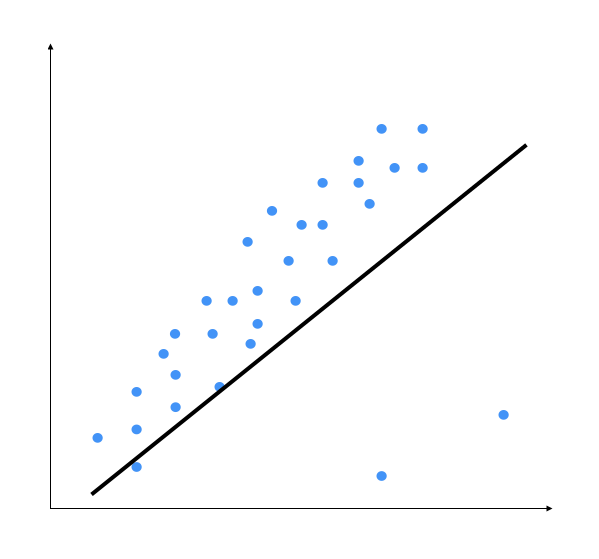
图　1-4

右下角的两个数据点明显是异常值，但是这个模型需要拟合所有的数据点，因此导致整个模型都错了。仅凭直觉观察，我们就会觉得如图1-5的拟合结果更好。
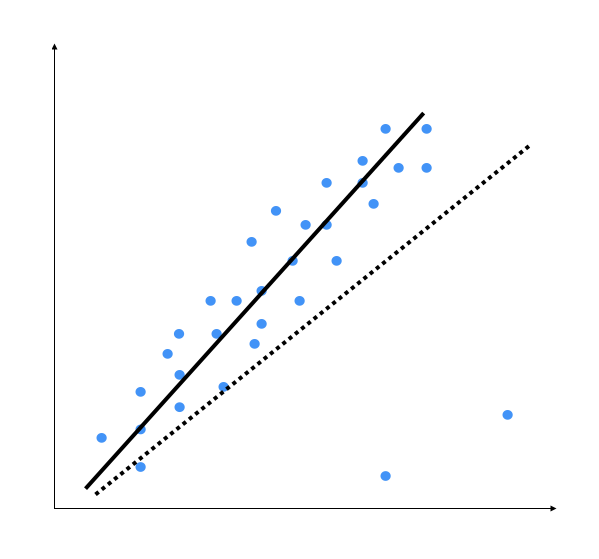
图　1-5

普通最小二乘法在建模时会考虑每个数据点的影响，因此，最终模型就会像图1-4显示的直线那样。显然，我们发现这个模型不是最优的。为了避免这个问题，我们引入正则化项的系数作为阈值来消除异常值的影响。这个方法被称为岭回归。

### 1.7.2　详细步骤
接下来看看如何用 Python 建立岭回归器。

(1) 你可以从 data_multi_variable.txt 文件中加载数据。这个文件的每一行都包含多个数值。除了最后一个数值外，前面的所有数值构成输入特征向量。

(2) 把下面的代码加入 regressor.py 文件中。我们用一些参数初始化岭回归器：


In [9]:
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

(3) alpha参数控制回归器的复杂程度。当alpha趋于0时，岭回归器就是用普通最小二乘法的线性回归器。因此，如果你希望模型对异常值不那么敏感，就需要设置一个较大的alpha值。这里把alpha值设置为0.01。

(4) 下面让我们来训练岭回归器。

In [10]:
ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)

print( "LINEAR:")
print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print( "Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2) )
print( "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2) )
print( "Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2) )
print( "R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

LINEAR:
Mean absolute error = 0.54
Mean squared error = 0.38
Median absolute error = 0.54
Explained variance score = 0.68
R2 score = 0.68


运行代码检查误差指标。可以用同样的数据建立一个线性回归器，并与岭回归器的结果进行比较，看看把正则化引入回归模型之后的效果如何。

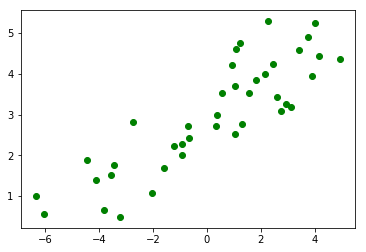

In [73]:
# 画散点图
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure()
plt.scatter(X_train, y_train, color='green') # 原始数据

## 1.8　创建多项式回归器
线性回归模型有一个主要的局限性，那就是它只能把输入数据拟合成直线，而多项式回归模型通过拟合多项式方程来克服这类问题，从而提高模型的准确性。

### 1.8.1　准备工作
先看图1-6。
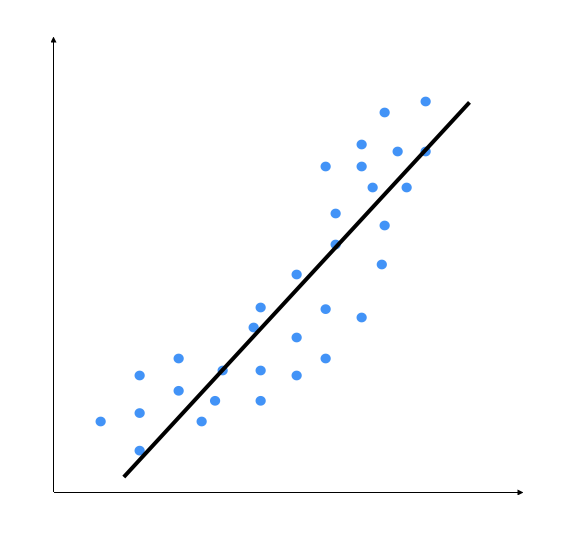
图　1-6

从图1-6中可以看到，数据点本身的模式中带有自然的曲线，而线性模型是不能捕捉到这一点的。再来看看多项式模型的效果，如图1-7所示。
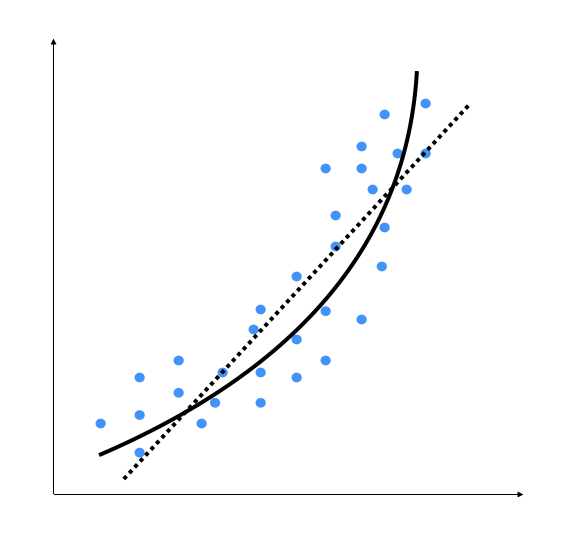
图　1-7

图1-7中的虚线表示线性回归模型，实线表示多项式回归模型。这个模型的曲率是由多项式的次数决定的。随着模型曲率的增加，模型变得更准确。但是，增加曲率的同时也增加了模型的复杂性，因此拟合速度会变慢。当我们对模型的准确性的理想追求与计算能力限制的残酷现实发生冲突时，就需要综合考虑了。
### 1.8.2　详细步骤
(1) 将下面的代码加入 Python 文件 regressor.py 中：

In [39]:
from sklearn.preprocessing import PolynomialFeatures
Featurespolynomial = PolynomialFeatures(degree=3)
# 原 import Polynomial 错误 ，改为PolynomialFeatures OK! 
# 查看 sklearn 版本
# sklearn.__version__

(2) 上一行将曲线的多项式的次数的初始值设置为3。下面用数据点来计算多项式的参数：

In [43]:
X_train_transformed = polynomial.fit_transform(X_train)

其中，X_train_transformed表示多项式形式的输入，与线性回归模型是一样大的。

(3) 接下来用文件中的第一个数据点来检查多项式模型是否能够准确预测：

In [44]:
datapoint = [0.39,2.78,7.11]
poly_datapoint = polynomial.fit_transform([datapoint])
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print( "\nLinear regression:", linear_regressor.predict([datapoint]) [0])
print( "\nPolynomial regression:", poly_linear_model.predict(poly_datapoint)[0])



Linear regression: -11.0587294983359

Polynomial regression: -8.150508083561363


可以发现，多项式回归模型的预测值更接近实际的输出值。如果想要数据更接近实际输出值，就需要增加多项式的次数。

(4) 将多项式的次数加到10看看结果：

In [42]:
polynomial = PolynomialFeatures(degree=10)

现在，你可以发现预测值与实际的输出值非常地接近。
我没有发现有什么变化！

In [45]:
# regression_multivar.py from GitHub/Python-Machine-Learning-Cookbook

import sys
import numpy as np

filename = sys.argv[1]
filename = 'data_multivar.txt'
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        data = [float(i) for i in line.split(',')]
        xt, yt = data[:-1], data[-1]
        X.append(xt)
        y.append(yt)

# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
#X_train = np.array(X[:num_training]).reshape((num_training,1))
X_train = np.array(X[:num_training])
y_train = np.array(y[:num_training])

# Test data
#X_test = np.array(X[num_training:]).reshape((num_test,1))
X_test = np.array(X[num_training:])
y_test = np.array(y[num_training:])

# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)
ridge_regressor.fit(X_train, y_train)

# Predict the output
y_test_pred = linear_regressor.predict(X_test)
y_test_pred_ridge = ridge_regressor.predict(X_test)

# Measure performance
import sklearn.metrics as sm

print ("LINEAR:")
print ("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2) )
print ("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2) )
print ("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2) )
print ("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2) )
print ("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

print ("\nRIDGE:")
print ("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2) )
print ("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2) )
print ("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2) )
print ("Explained variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2) )
print ("R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

# Polynomial regression 多项式回归
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=10)
X_train_transformed = polynomial.fit_transform(X_train)
datapoint = [0.39,2.78,7.11]
poly_datapoint = polynomial.fit_transform([datapoint])

poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print ("\nLinear regression:\n", linear_regressor.predict([datapoint]))
print ("\nPolynomial regression:\n", poly_linear_model.predict(poly_datapoint))

# Stochastic Gradient Descent regressor 随机梯度下降回归
sgd_regressor = linear_model.SGDRegressor(loss='huber', n_iter=50)
sgd_regressor.fit(X_train, y_train)
print ("\nSGD regressor:\n", sgd_regressor.predict([datapoint]))
# datapoint 作为变量的值是2维，而[datapoint] 就变成了1维。

LINEAR:
Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explained variance score = 0.84
R2 score = 0.83

RIDGE:
Mean absolute error = 3.95
Mean squared error = 23.15
Median absolute error = 3.69
Explained variance score = 0.84
R2 score = 0.83

Linear regression:
 [-11.0587295]

Polynomial regression:
 [-8.15050808]

SGD regressor:
 [-7.96283483]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  raise ValueError("early_stopping must be either True or False")


## 1.9　估算房屋价格
是时候用所学的知识来解决真实世界的问题了。让我们用这些原理来估算房屋价格。房屋估价是理解回归分析最经典的案例之一，通常是一个不错的切入点。它符合人们的直觉，而且与人们的生活息息相关，因此在用机器学习处理复杂事情之前，通过房屋估价可以更轻松地理解相关概念。我们将使用带 AdaBoost 算法的决策树回归器（decision tree regressor）来解决这个问题。

### 1.9.1　准备工作
决策树是一个树状模型，每个节点都做出一个决策，从而影响最终结果。叶子节点表示输出数值，分支表示根据输入特征做出的中间决策。AdaBoost 算法是指自适应增强（adaptive boosting）算法，这是一种利用其他系统增强模型准确性的技术。这种技术是将不同版本的算法结果进行组合，用加权汇总的方式获得最终结果，被称为弱学习器（weak learners）。AdaBoost 算法在每个阶段获取的信息都会反馈到模型中，这样学习器就可以在后一阶段重点训练难以分类的样本。这种学习方式可以增强系统的准确性。

首先使用 AdaBoost 算法对数据集进行回归拟合，再计算误差，然后根据误差评估结果，用同样的数据集重新拟合。可以把这些看作是回归器的调优过程，直到达到预期的准确性。假设你拥有一个包含影响房价的各种参数的数据集，我们的目标就是估计这些参数与房价的关系，这样就可以根据未知参数估计房价了。

1.9.2　详细步骤
(1) 创建一个新的 Python 文件 housing.py，然后加入下面的代码：


In [16]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline 

(2) 网上有一个标准房屋价格数据库，人们经常用它来研究机器学习。你可以在这里下载数据。不过 scikit-learn 提供了数据接口，可以直接通过下面的代码加载数据：

In [2]:
housing_data = datasets.load_boston()

每个数据点由影响房价的13个输入参数构成。你可以用housing_data.data获取输入的数据，用housing_data.target获取对应的房屋价格。

(3) 接下来把输入数据与输出结果分成不同的变量。我们可以通过shuffle函数把数据的顺序打乱：

In [5]:
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

(4) 参数random_state用来控制如何打乱数据，让我们可以重新生成结果。接下来把数据分成训练数据集和测试数据集，其中80%的数据用于训练，剩余20%的数据用于测试：

In [8]:
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

(5) 现在已经可以拟合一个决策树回归模型了。选一个最大深度为4的决策树，这样可以限制决策树不变成任意深度：

In [9]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [15]:
#带AdaBoost算法的决策树回归模型进行拟合 #######例子缺少2行！
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

这样可以帮助我们对比训练效果，看看 AdaBoost 算法对决策树回归器的训练效果有多大改善。

(7) 接下来评价决策树回归器的训练效果：

In [11]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print( "#### Decision Tree performance ####")
print( "Mean squared error =", round(mse, 2))
print( "Explained variance score =", round(evs, 2))

#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


(8) 现在评价一下 AdaBoost 算法改善的效果：

In [16]:
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print ("#### AdaBoost performance ####")
print ("Mean squared error =", round(mse, 2))
print ("Explained variance score =", round(evs, 2))

#### AdaBoost performance ####
Mean squared error = 7.66
Explained variance score = 0.91


(9) 命令行工具显示的输出结果如下所示：

In [ ]:
#### 决策树学习效果 ####
Mean squared error = 14.79
Explained variance score = 0.82
#### AdaBoost算法改善效果 ####
Mean squared error = 7.54
Explained variance score = 0.91

前面的结果表明，AdaBoost 算法可以让误差更小，且解释方差分更接近1。

## 1.10　计算特征的相对重要性
所有特征都同等重要吗？在这个案例中，我们用了13个特征，它们对模型都有贡献。但是，有一个重要的问题出现了：如何判断哪个特征更加重要？显然，所有的特征对结果的贡献是不一样的。如果需要忽略一些特征，就需要知道哪些特征不太重要。scikit-learn 里面有这样的功能。

详细步骤

(1) 画出特征的相对重要性，在 housing.py 文件中加入下面几行代码：


回归器对象有一个feature_importances_方法会告诉我们每个特征的相对重要性。

(2) 接下来需要定义plot_feature_importances来画出条形图：

In [22]:
def plot_feature_importances(feature_importances, title, feature_names):   
    # 将重要性值标准化    
    feature_importances = 100.0 * (feature_importances / max(feature_importances))    
    # 将得分从高到低排序    
    index_sorted = np.flipud(np.argsort(feature_importances))    
    # 让X坐标轴上的标签居中显示    
    pos = np.arange(index_sorted.shape[0]) + 0.5    
    # 画条形图    
    plt.figure()   
    plt.bar(pos, feature_importances[index_sorted], align='center')    
    plt.xticks(pos, feature_names[index_sorted])    
    plt.ylabel('Relative Importance')    
    plt.title(title)    
    plt.show()
    # return None # 另一个例子加上这行

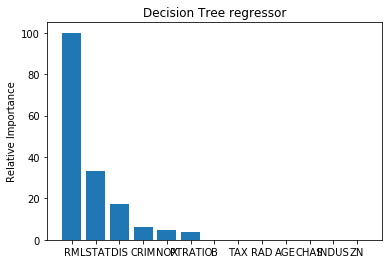

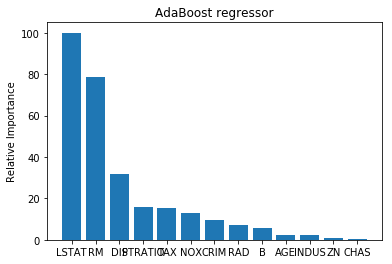

In [23]:
plot_feature_importances(dt_regressor.feature_importances_, 'Decision Tree regressor', housing_data.feature_names)
plot_feature_importances(ab_regressor.feature_importances_, 'AdaBoost regressor', housing_data.feature_names)


(3) 我们从 plot_feature_importances_方法里取值，然后把数值放大到0~100的范围内。运行前面的代码，可以看到两张图（不带 AdaBoost 算法与带 AdaBoost 算法两种模型）。仔细观察图1-8和图1-9，看看能从决策树回归器中获得什么。

(4) 从图1-8可以发现，不带 AdaBoost 算法的决策树回归器显示的最重要特征是 RM。再看看带 AdaBoost 算法的决策树回归器的特征重要性排序条形图，如图1-9所示。

加入 AdaBoost 算法之后，房屋估价模型的最重要特征是 LSTAT。在现实生活中，如果对这个数据集建立不同的回归器，就会发现最重要的特征是 LSTAT，这足以体现 AdaBoost 算法对决策树回归器训练效果的改善。

## 1.11　评估共享单车的需求分布
本节将用一种新的回归方法解决共享单车的需求分布问题。我们采用随机森林回归器（random forest regressor）估计输出结果。随机森林是一个决策树集合，它基本上就是用一组由数据集的若干子集构建的决策树构成，再用决策树平均值改善整体学习效果。

### 1.11.1　准备工作
我们将使用 bike_day.csv 文件中的数据集获取。这份数据集一共16列，前两列是序列号与日期，分析的时候可以不用；最后三列数据是不同类型的输出结果；最后一列是第十四列与第十五列的和，因此建立模型时可以不考虑第十四列与第十五列。

### 1.11.2　详细步骤
接下来看看 Python 如何解决这个问题。如果你下载了本书源代码，就可以看到 bike_sharing.py 文件里已经包含了完整代码。这里将介绍若干重要的部分。

(1) 首先导入一些新的程序包，如下：

In [4]:
import csv
from sklearn.ensemble import RandomForestRegressor
from housing import plot_feature_importances
import numpy as np

(2) 我们需要处理 CSV 文件，因此加入了 csv 程序包来读取 CSV 文件。由于这是一个全新的数据集，因此需要自己定义一个数据集加载函数：

In [193]:
def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'r'),  delimiter=',')
    X, y = [], []
    for row in file_reader:
        # X.append(row[3:13])  # 每行取第3到12列，第2列是日期。
        X.append(row[3:15]) # 把第十四列与第十五列数据加入数据集，看看结果有什么区别。
        y.append(row[-1])      # 目标是每行的最后1列。

    # 提取特征名称
    feature_names = np.array(X[0])  # 先看数据集，列名在第0行。

    # 将第一行特征名称移除，仅保留数值
    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

In [194]:
X, y, feature_names = load_dataset("bike_day.csv")    # (sys.argv[1]) # 直接读入bike_day.csv错误，只取有数值的7列bike_day_7.csv 通过。

In [24]:
X, y, feature_names = load_dataset("boston_house_prices.csv")    # (sys.argv[1]) # 直接读入bike_day.csv错误，只取有数值的7列bike_day_7.csv 通过。

In [195]:
X, y = shuffle(X, y, random_state=7)

在这个函数中，我们从 CSV 文件读取了所有数据。把数据显示在图形中时，特征名称非常有用。把特征名称数据从输入数值中分离出来，并作为函数返回值。

(3) 读取数据，并打乱数据顺序，让新数据与原来文件中数据排列的顺序没有关联性：

In [196]:
X.shape

(731, 12)

(4) 和之前的做法一样，需要将数据分成训练数据和测试数据。这一次，我们将90%的数据用于训练，剩余10%的数据用于测试：

In [197]:
num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

(5) 下面开始训练回归器：

In [198]:
rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2) # 原 =1错误
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

其中，参数n_estimators是指评估器（estimator）的数量，表示随机森林需要使用的决策树数量；参数max_depth是指每个决策树的最大深度；参数min_samples_split是指决策树分裂一个节点需要用到的最小数据样本量。

(6) 评价随机森林回归器的训练效果：

In [199]:
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "#### Random Forest regressor performance ####")
print( "Mean squared error =", round(mse, 2))
print( "Explained variance score =", round(evs, 2))

#### Random Forest regressor performance ####
Mean squared error = 233685.45
Explained variance score = 0.93


(7) 由于已经有画出特征重要性条形图的函数plot_feature_importances了，接下来直接调用它：

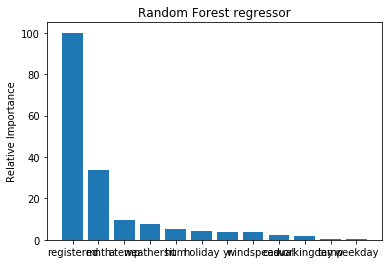

In [200]:
plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_names)

图　1-10

看来温度（temp）是影响自行车租赁的最重要因素。

### 1.11.3　更多内容
把第十四列与第十五列数据加入数据集，看看结果有什么区别。在新的特征重要性条形图中，除了这两个特征外，其他特征都变成了0。这是由于输出结果可以通过简单地对第十四列与第十五列数据求和得出，因此算法不需要其他特征计算结果。在数据集加载函数load_dataset中，我们需要对for循环内的取值范围稍作调整：

In [ ]:
X.append(row[2:15])

In [ ]:
现在再画出特征重要性条形图，可以看到如图1-11所示的柱形图。
图　1-11

与预想的一样，从图中可以看出，只有这两个特征是重要的，这确实也符合常理，因为最终结果仅仅是这两个特征相加得到的。因此，这两个变量与输出结果有直接的关系，回归器也就认为它不需要其他特征来预测结果了。在消除数据集冗余变量方面，这是非常有用的工具。

还有一份按小时统计的自行车共享数据bike_hour.csv。我们需要用到第3~14列，因此先对数据集加载函数load_dataset做一点调整：

X.append(row[2:14])


#### Random Forest regressor performance ####
Mean squared error = 0.35
Explained variance score = 0.74


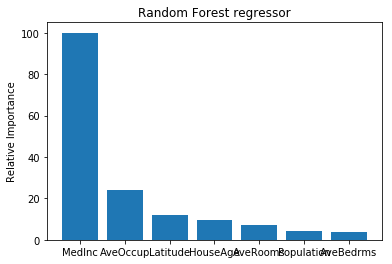

In [180]:
# bike_sharing.py
import sys
import csv

import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from housing import plot_feature_importances

def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'r'), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[1:8]) # 数据0列是序号，9列是目标值房价，取1~8列。取少了过拟合，误差0，得分1。
        y.append(row[-1])   # 取列需要根据数据集的情况决定特征值 X 的列数。

    # Extract feature names
    feature_names = np.array(X[0]) # 特征的名称在第0行，分析结果时用。

    # Remove the first row because they are feature names
    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

if __name__=='__main__':
    # Load the dataset from the input file
    """
    from sklearn.datasets.california_housing import fetch_california_housing
    housing=fetch_california_housing()
    X = housing.data
    y = housing.target
     该数据包含9个变量的20640个观测值，
     该数据集包含平均房屋价值作为目标变量和以下输入变量（特征）：
     平均收入、房屋平均年龄、平均房间、平均卧室、人口、平均占用、纬度和经度。
     ['MedInc',  'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
      'AveOccup', 'Latitude', 'Longitude', 'target']
    """    
    X, y, feature_names = load_dataset("housing_t.csv") # ("bike_day.csv") # (sys.argv[1])
    # 程序可以分析其它数据集，
    X, y = shuffle(X, y, random_state=7) 

    # Split the data 80/20 (80% for training, 20% for testing)
    num_training = int(0.9 * len(X))
    X_train, y_train = X[:num_training], y[:num_training]
    X_test, y_test = X[num_training:], y[num_training:]

    # Fit Random Forest regression model
    rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
    rf_regressor.fit(X_train, y_train)

    # Evaluate performance of Random Forest regressor
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred) 
    print ("\n#### Random Forest regressor performance ####")
    print ("Mean squared error =", round(mse, 2))
    print ("Explained variance score =", round(evs, 2))

    # Plot relative feature importances 
    plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_names)


In [177]:
#  我的数据预处理程序
# 做成适合随机森林回归算法所需的数据集：
# 具有列名，前部列是特征列，最后1列是目标值，用逗号分隔的.csv文件。
# 供bike_sharing.py使用。
# 读取导入的数据集，合并data和 target ,
# 加上数据集,命名为 housing里的特征名 housing.feaure_names，
# 保存为 .csv文件。

# 读取数据集
from sklearn.datasets.california_housing import fetch_california_housing
housing=fetch_california_housing()
housing # 数据集描述
X = housing.data
y = housing.target
X.shape
y.shape
# 读取特征名
names = housing.feature_names
# 追加目标特征名
names.append('target')

# 合并DataFrame
import pandas as pd
X = pd.DataFrame(housing.data)
y = pd.DataFrame(housing.target)

# 合并 X和 y成为 df
df = pd.concat([X, y], axis=1)
# 保存文件
df.to_csv(filename, header=names)


a = 0.39
b = 2.91
y = 0.39 * X + 2.91 


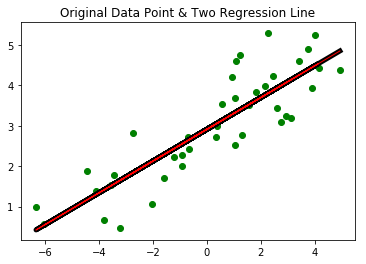

In [17]:
# 求解线性回归方程的系数 y = a*X + b 用最小二乘法
# 我的练习
# 1.4 线形回归器
#regressor.py with datafile data_singlevar.txt
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filename = sys.argv[1]
X = []
y = []
with open("data_singlevar.txt", 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

#2.为了检验机器学习模型是否达到满意度，将数据分为训练和测试2组
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
# Training data 准备数据
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

#3.已经准备好了训练模型，创建回归器对象
from sklearn import linear_model # 导入线性模块。
linear_regressor = linear_model.LinearRegression() # 命名回归器，定义模型为线性回归。
# Train the model using the training sets
linear_regressor.fit(X_train, y_train) # 用训练数据训练拟合回归器。
y_train_pred = linear_regressor.predict(X_train) #4.检查拟合，
# 使用拟合过的拟合器对训练数据预测结果。

# 求解线性回归方程的系数 y = a*X + b 最小二乘法
X = pd.DataFrame(X_train)
y = pd.DataFrame(y_train)
df = pd.concat([X, y], axis=1)
X_sum, y_sum = df.sum(axis=0)
X_mean, y_mean = df.mean()
X_mean, y_mean
Xy_mean = (X*y).mean()
XX_mean = (X*X).mean()
# 系数
a = (X_mean*y_mean - Xy_mean) / (X_mean*X_mean - XX_mean)
b = y_mean - a*X_mean
print('a = %3.2f'%a)
print('b = %3.2f'%b)
print('y = %3.2f ' %a + '* X + %3.2f ' %b)
# out: a = 0.39    b = 2.91    y = 0.39 * X + 2.91 

# 验证回归系数
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train, y_train, color='green') # 原始数据
plt.plot(X, a*X+b, color='black', linewidth=5) # 最小二乘法的回归线
plt.plot(X, y_train_pred, color='red', linewidth=1) # 预测的回归线
plt.title('Original Data Point & Two Regression Line')
plt.show()
# 由图可见，最小二乘法和线性回归预测的结果相符。

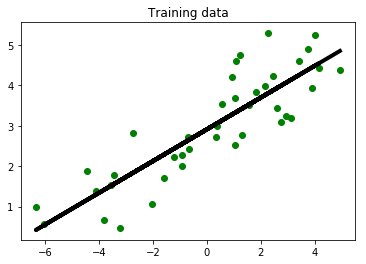

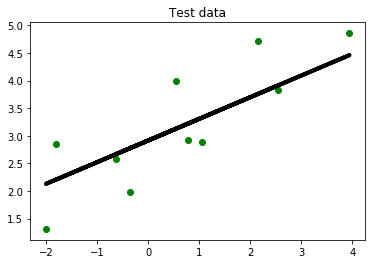

Mean absolute error 平均误差= 0.54
Mean squared error 均方误差= 0.38
Median absolute error 中位数绝对误差= 0.54
Explain variance score 解释方差分best 1= 0.68
R2 score R方得分，相关系数best 1= 0.68

Linear regression:
 [3.06649462]
(1, 20)
(5, 4)

Polynomial regression:
 [ 3.04922632  3.39118583 28.08520341  4.23858245 26.94022106]

SGD regressor:
 [0.43046297 0.62927301 0.98946023]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [26]:
# 1.7 岭回归器
#regressor.py 
import numpy as np
import matplotlib.pyplot as plt
"""
import utilities
# Load input data
input_file = "data_multivar01_X4.txt"
X, y = utilities.load_data(input_file)
"""
filename = "data_singlevar.txt" #sys.argv[1]#"data_multivar01_X4.txt"#
X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

#2.为了检验机器学习模型是否达到满意度，将数据分为训练和测试2组
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

#3.已经准备好了训练模型，创建回归器对象
# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()

#用训练数据集训练线形回归器，向fit方法输入数据即可
# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

#4.检查拟合
y_train_pred = linear_regressor.predict(X_train)

# Plot outputs
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()


# Predict the output
y_test_pred = linear_regressor.predict(X_test)

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

# Measure performance
import sklearn.metrics as sm

ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print ( "Mean absolute error 平均误差=", round(sm.mean_absolute_error(y_test, y_test_pred), 2) )
print ( "Mean squared error 均方误差=", round(sm.mean_squared_error(y_test, y_test_pred), 2) )
print ( "Median absolute error 中位数绝对误差=", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print ( "Explain variance score 解释方差分best 1=", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print ( "R2 score R方得分，相关系数best 1=", round(sm.r2_score(y_test, y_test_pred), 2))

# Polynomial regression
# 1.8 多项式回归
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=3)
#3次多项式
X_train_transformed = polynomial.fit_transform(X_train)

#数据第一点测试
datapoint = [0.39,2.78,7.11]
poly_datapoint = polynomial.fit_transform([datapoint])

#例 input_data_encoded = input_data_encoded.reshape(1, len(input_data))
#poly_datapoint = poly_datapoint.reshape(1,len(poly_datapoint))

poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)

print ("\nLinear regression:\n", linear_regressor.predict(datapoint[0]))
print(poly_datapoint.shape) # 测试用
poly_datapoint = np.reshape(poly_datapoint,(5,-1))
print(poly_datapoint.shape) # 测试用
print ("\nPolynomial regression:\n", poly_linear_model.predict(poly_datapoint))

# Stochastic Gradient Descent regressor
sgd_regressor = linear_model.SGDRegressor(loss='huber', n_iter=50)
sgd_regressor.fit(X_train, y_train)
datapoint = np.reshape(datapoint,(3,1))# 根据错误提示增加的,由(1,3)转为(3,1)
print ("\nSGD regressor:\n", sgd_regressor.predict(datapoint))

In [ ]:
# Polynomial regression
# 1.8 多项式回归
# Polynomial regression
import numpy as np
from sklearn import neighbors, datasets
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=10)
X_train_transformed = polynomial.fit_transform(X_train)
datapoint = [0.39,2.78,7.11]
poly_datapoint = polynomial.fit_transform(datapoint)

poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)
print ("\nLinear regression:\n", linear_regressor.predict(datapoint))
print ("\nPolynomial regression:\n", poly_linear_model.predict(poly_datapoint))

# Stochastic Gradient Descent regressor
sgd_regressor = linear_model.SGDRegressor(loss='huber', n_iter=50)
sgd_regressor.fit(X_train, y_train)
print ("\nSGD regressor:\n", sgd_regressor.predict(datapoint))

"""
以上是原文
from sklearn.preprocessing import PolynomialFeatures

polynomial = PolynomialFeatures(degree=3)
#3次多项式
X_train_transformed = polynomial.fit_transform(X_train)
#数据第一点测试

datapoint = [0.39,2.78,7.11]
poly_datapoint = polynomial.fit_transform([datapoint])

#例 input_data_encoded = input_data_encoded.reshape(1, len(input_data))
#poly_datapoint = poly_datapoint.reshape(1,len(poly_datapoint))

poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(X_train_transformed, y_train)

print ("\nLinear regression:\n", linear_regressor.predict((datapoint)[0]))

print(poly_datapoint.shape)
print(poly_datapoint)
poly_datapoint = poly_datapoint.reshape(1,len([poly_datapoint]))
print ("\nPolynomial regression:\n", poly_linear_model.predict((poly_datapoint)[0]))
"""


#### Decision Tree performance决策树回归器的学习效果 ####
Mean squared error均方误差 = 14.79
Explained variance score解释方差分 = 0.82

#### AdaBoost performance自适应增强算法的改善 ####
Mean squared error = 7.64
Explained variance score = 0.91


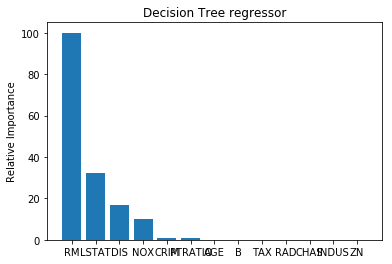

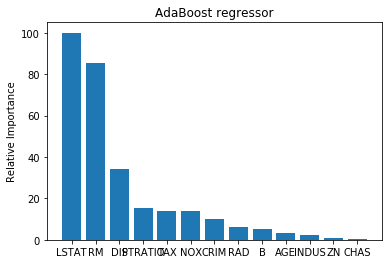

In [21]:
#housing.py
# 1.9 估算房屋价格
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

def plot_feature_importances(feature_importances, title, feature_names):
    # Normalize the importance values 重要性标准化
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # Sort the values and flip them 索引从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Arrange the X ticks
    pos = np.arange(index_sorted.shape[0]) + 0.5

    # Plot the bar graph
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()

if __name__=='__main__':
    # Load housing data
    housing_data = datasets.load_boston() 
    
    #print(housing_data)如何保存？用model pickle显示
    """
    import pickle as pickle
    output_model_file = 'saved_model.pkl'#'3_model_linear_regr.pkl'

     75 with open(output_model_file, 'w') as f:
---> 76     pickle.dump(linear_regressor, f)
     77 
     78 with open(output_model_file, 'r') as f:

TypeError: write() argument must be str, not bytes
    """
    
    # Shuffle the data
    X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

    # Split the data 80/20 (80% for training, 20% for testing)
    num_training = int(0.8 * len(X))
    X_train, y_train = X[:num_training], y[:num_training]
    X_test, y_test = X[num_training:], y[num_training:]

    # Fit decision tree regression model
    dt_regressor = DecisionTreeRegressor(max_depth=4)
    dt_regressor.fit(X_train, y_train)

    # Fit decision tree regression model with AdaBoost
    ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
    ab_regressor.fit(X_train, y_train)

    # Evaluate performance of Decision Tree regressor
    y_pred_dt = dt_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_dt)
    evs = explained_variance_score(y_test, y_pred_dt) 
    print ("\n#### Decision Tree performance决策树回归器的学习效果 ####")
    print ("Mean squared error均方误差 =", round(mse, 2))
    print ("Explained variance score解释方差分 =", round(evs, 2))

    # Evaluate performance of AdaBoost
    y_pred_ab = ab_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_ab)
    evs = explained_variance_score(y_test, y_pred_ab) 
    print ("\n#### AdaBoost performance自适应增强算法的改善 ####")
    print ("Mean squared error =", round(mse, 2))
    print ("Explained variance score =", round(evs, 2))
    
    #画出特征的相对重要性
    # Plot relative feature importances 
    plot_feature_importances(dt_regressor.feature_importances_, 
            'Decision Tree regressor', housing_data.feature_names)
    plot_feature_importances(ab_regressor.feature_importances_, 
            'AdaBoost regressor', housing_data.feature_names)
    #使用adaboost以后重要性不同RM->LTAT


#### Random Forest regressor performance ####
Mean squared error = 228944.98
Explained variance score = 0.93


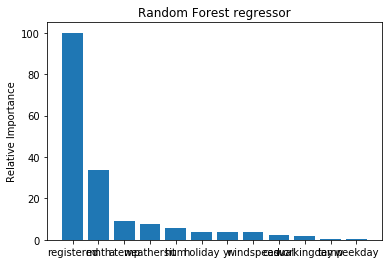

In [217]:
# bike_sharing.py
# 1.11 评估共享单车的需求分布
import sys
import csv

import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from housing import plot_feature_importances
def load_dataset(filename):
    file_reader = csv.reader(open(filename, 'r'), delimiter=',')
    X, y = [], []
    for row in file_reader:
        X.append(row[3:15]) # old [3:13] 改变使用的特征将改变影响预测结果的特征因素。
        y.append(row[-1])

    # Extract feature names
    feature_names = np.array(X[0])

    # Remove the first row because they are feature names
    return np.array(X[1:]).astype(np.float32), np.array(y[1:]).astype(np.float32), feature_names

if __name__=='__main__':
    # Load the dataset from the input file
    X, y, feature_names = load_dataset('bike_day.csv')  # ('bike_day.csv')# (bike_hour.csv)#(sys.argv[1])
    X, y = shuffle(X, y, random_state=7) 

    # Split the data 80/20 (80% for training, 20% for testing)
    num_training = int(0.9 * len(X))
    X_train, y_train = X[:num_training], y[:num_training]
    X_test, y_test = X[num_training:], y[num_training:]

    # Fit Random Forest regression model
    rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
    rf_regressor.fit(X_train, y_train)

    # Evaluate performance of Random Forest regressor
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred) 
    print ("\n#### Random Forest regressor performance ####")
    print ("Mean squared error =", round(mse, 2))
    print ("Explained variance score =", round(evs, 2))

    # Plot relative feature importances 
    plot_feature_importances(rf_regressor.feature_importances_, 'Random Forest regressor', feature_names)


$$a = \frac{\bar{X}\bar{Y} - \widehat{XY}}{(\bar{X})^2 - \widetilde{X^2}} $$,
$$b = \bar{Y} - a\bar{X}$$

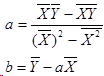